# Simple - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1 = pd.read_csv('../input/ecommerce-customers/Ecommerce Customers.csv')

In [3]:
data1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data1.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
sns.set_palette('RdYlGn',10)
sns.set_style('whitegrid')

### Exploratory Data Analysis -For the rest of the exercise we'll only be using the numerical data of the csv file.

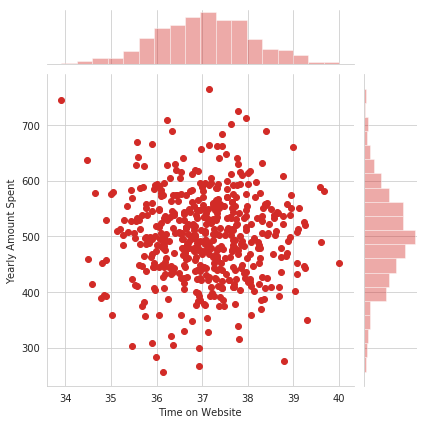

In [7]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data =data1)

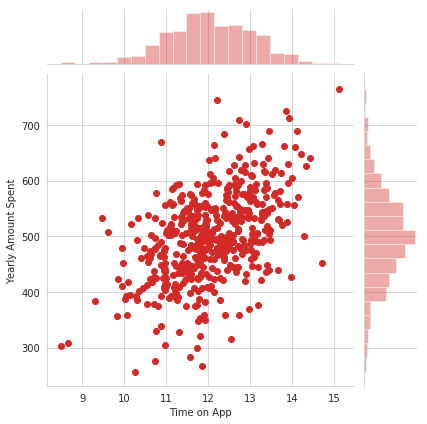

In [8]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent' ,data= data1)

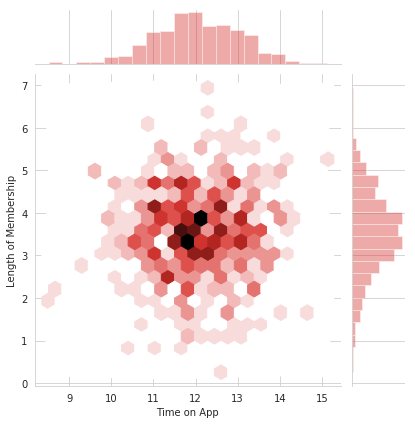

In [9]:
sns.jointplot(x='Time on App',y ='Length of Membership', kind='hex',data = data1)

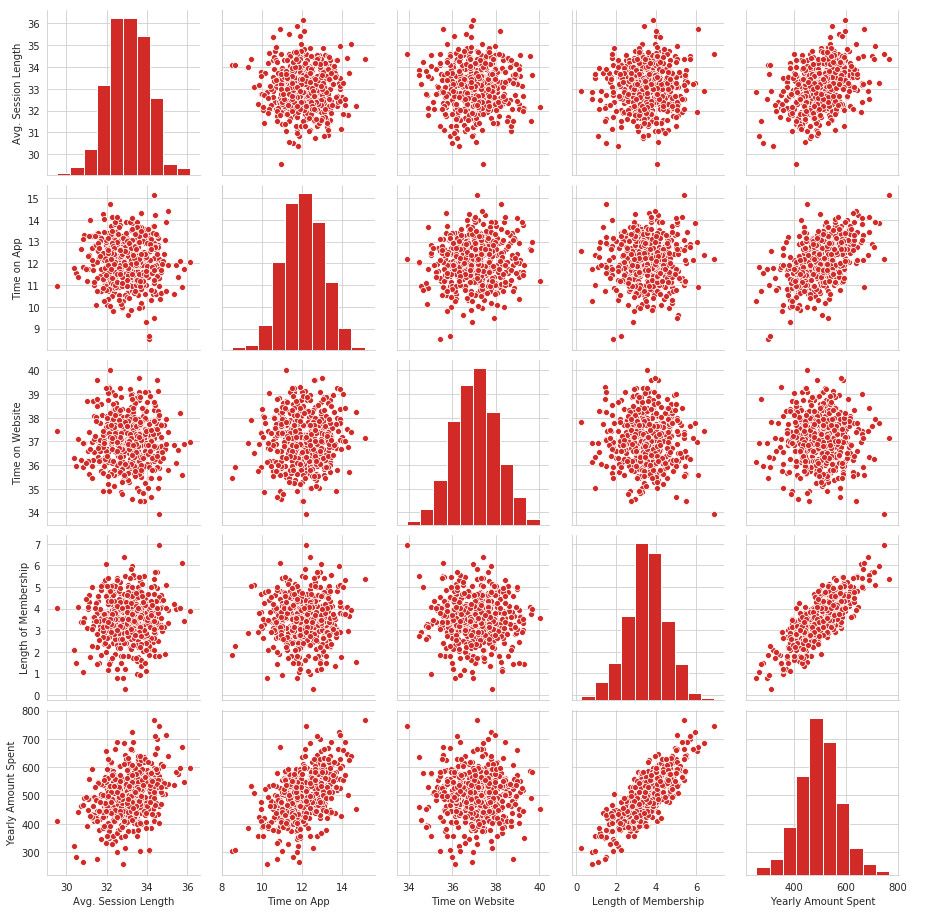

In [10]:
sns.pairplot(data1)

#### Based off this plot what looks to be the most correlated feature with Yearly Amount Spent Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

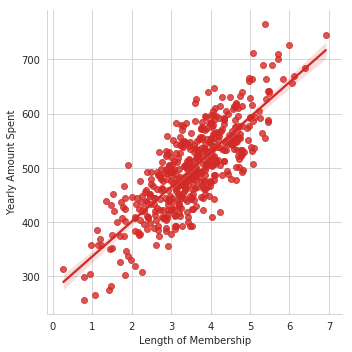

In [11]:
sns.lmplot(x='Length of Membership',y ='Yearly Amount Spent', data = data1)

### Training and Testing Data¶

#### Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the Yearly Amount Spent column.

In [12]:
X= data1.iloc[:,[3,4,5,6]]
Y= data1.iloc[:,-1]

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=100


In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

### Training the Model¶


#### Now its time to train our model on our training data.



In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print out the coefficients of the model





In [15]:
lr.coef_

array([26.15532442, 38.62008495,  0.31760346, 61.82039405])

### Predicting Test Data¶


#### Now that we have fit our model, let's evaluate its performance by predicting off the test values.



In [16]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

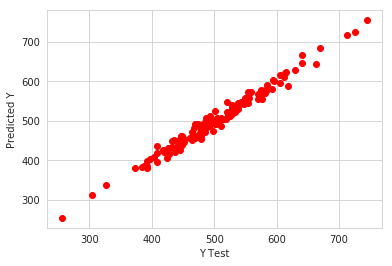

In [17]:
plt.scatter(Y_test, predictions , color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
from sklearn import metrics

### Evaluating the Model¶


#### Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.




In [19]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test, predictions))
print('MSE :'," ",metrics.mean_squared_error(Y_test, predictions))
print('RMAE:'," ", np.sqrt(metrics.mean_squared_error(Y_test , predictions)))

MAE :   8.511790302409956
MSE :   114.3761808077009
RMAE:   10.694680023623938


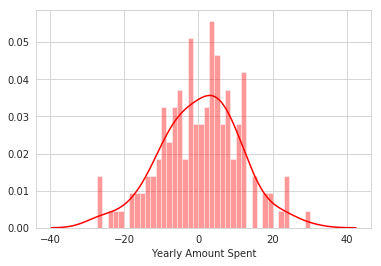

In [20]:
sns.distplot(Y_test- predictions, bins=40 , color = 'red')

### Thanku !!!!!